In [6]:
import pandas
import numpy
import matplotlib.pyplot as plt
import specplotlib
from tqdm import tqdm_notebook as tqdm
import kpra_funcs
from importlib import reload
import glob 

from sklearn.preprocessing import Imputer

In [10]:
# import the df, spectra, flux and sn_names matrixes
reload(kpra_funcs)
kpr_df = pandas.read_csv('kpra_union_df.csv')
sn_names = numpy.load('kpra_sn_names.npy')
W_kpr = numpy.load('/Users/natalie/git/SNIa/W_kpr.npy')
F_kpr = numpy.load('/Users/natalie/git/SNIa/F_kpr.npy')

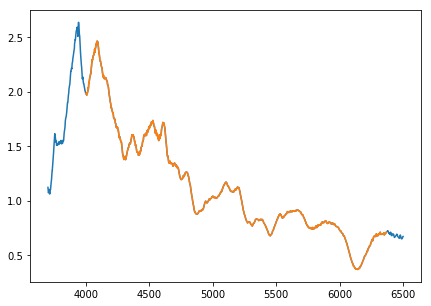

In [11]:
# Plot the k spectra example bins to choose the bins
k=kpr_df[kpr_df['sn_kpr'] == '1994d'].index[0]

plt.figure(figsize = (7,5))
plt.plot(W_kpr, F_kpr[k])

# SiII 6130 and 5780 - orange
#(array([5912.73374889]), array([6370.88156723]))

min_wl = 4000#5650
max_wl = 6370#6380
idx_min, val_min = kpra_funcs.find_nearest(W_kpr,min_wl)
idx_max, val_max = kpra_funcs.find_nearest(W_kpr,max_wl)
#print(idx_min,idx_max)
plt.plot(W_kpr[idx_min:idx_max], F_kpr[k,idx_min:idx_max])

plt.show()

In [12]:
# find the idx that match the tol critiria
idx = kpra_funcs.select_spec_from_peak_by_bin(kpr_df, F_kpr, W_kpr, 0.8, sn_names, min_wl, max_wl)

# create a matrix with spectra for good sne and nans for not
reload(kpra_funcs)
F_si6130, use_inds = kpra_funcs.create_umap_flux_mat(F_kpr, sn_names, idx, idx_min, idx_max)
# now F_si6130 has nans where the sne fails the cut and thespectra where it is good

# the impute will make the sne with nans have the median spectra of all batch, since we can't run umap with nans
F_si6130, W_si6130 = kpra_funcs.impute_spec(F_si6130, W_kpr[idx_min:idx_max]) 

# normalize the spectra again according to the median of the choosen bin
reload(kpra_funcs)
F_si6130 = kpra_funcs.norm_by_bin(F_si6130)

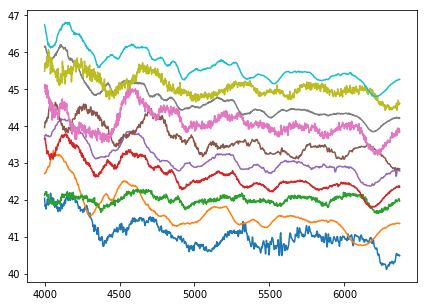

In [13]:
plt.figure(figsize = (7,5))

#print(idx_min,idx_max)
for i in range(80,90):
    plt.plot(W_kpr[idx_min:idx_max], F_si6130[use_inds][i] + i*0.5)
plt.show()

/Users/natalie/anaconda2/envs/fun/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/natalie/anaconda2/envs/fun/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


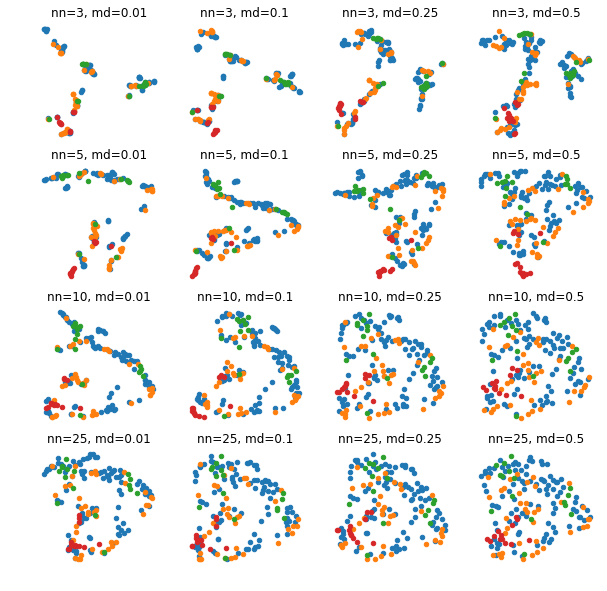

In [15]:
from importlib import reload
reload(specplotlib)

# fit with umap distance calculation using default matrix (uclidiean) - with only sne with good spectra (not median), color by groups
c = numpy.load('supernova_toast/kpra/colors/WClass.npy')
specplotlib.umap_param_scan(F_si6130[use_inds], save=False, c=c[use_inds])

/Users/natalie/anaconda2/envs/fun/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


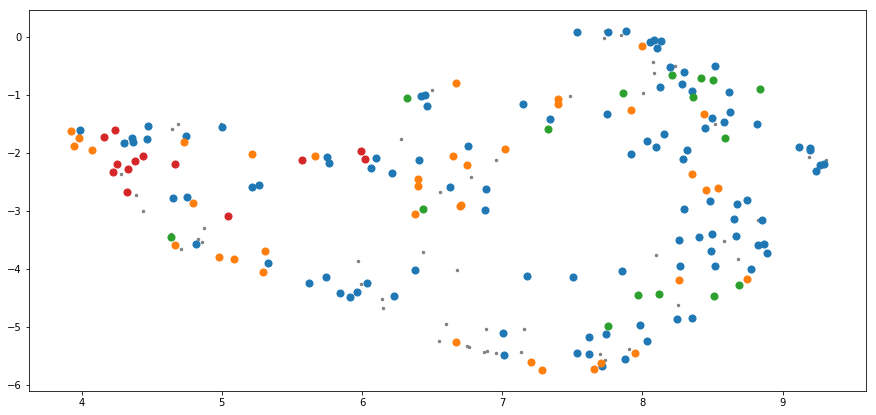

In [16]:
import umap
t_umap = umap.UMAP(n_neighbors=25,min_dist=0.01).fit_transform(F_si6130[use_inds])

plt.figure(figsize = (15,7))
x = t_umap[:, 0]
y = t_umap[:, 1]

uc = numpy.unique(c)
plt.scatter(x, y, s=6, c='gray')
uc = numpy.unique(c)
uc = uc[numpy.isfinite(uc)]
for uc_ in uc:
    inds = numpy.where(c[use_inds] == uc_)[0]
    plt.scatter(x[inds], y[inds], s=50)
plt.show()

# manualy put -9999 value on spectra with median spectra (failed spectra) so that we can cut from display range
si6130_umap = numpy.ones([F_si6130.shape[0],2])*(-9999)
si6130_umap[use_inds] = t_umap

In [ ]:
"""
# save the current matixes for (5650,6300) bin with tol = 0.8 and umap
#numpy.save('/Users/natalie/git/SNIa/supernova_toast/kpra/maps/si6130_umap_080', si6130_umap)
numpy.save('/Users/natalie/git/SNIa/W_si6130_080', W_si6130)
numpy.save('/Users/natalie/git/SNIa/F_si6130_080', F_si6130)
"""